In [2]:
import pandas as pd
import scipy 
import numpy as np
from scipy import stats
import seaborn as sns

###  Q1-->A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [5]:
# H0=Null Hypothesis= There is no significant difference in the diameter of the cutlet between two units.
# H1= Alternative Hypothesis= There is any significant difference in the diameter of the cutlet between two units.

In [123]:
a= pd.read_csv("Cutlets (1).csv")

In [124]:
a.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [125]:
a.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


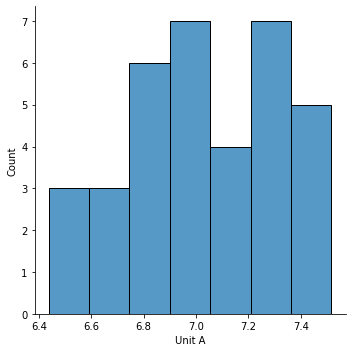

In [126]:
sns.displot(data=a,x="Unit A",kind="hist")

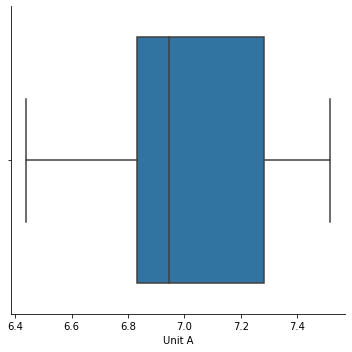

In [127]:
sns.catplot(data= a, x="Unit A", kind="box")

In [128]:
from statsmodels.stats import weightstats

In [129]:
Unit_A=pd.Series(a.iloc[:,0])

In [130]:
Unit_B=pd.Series(a.iloc[:,1])

In [131]:
Unit_A.head(5)

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [133]:
a["Unit A"].head()

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [41]:
weightstats.ztest(x1= a["Unit A"], value=7.019091,alternative='two-sided')   # 0.99 isnprobability value and 8 is z value(calculated by formula)

(8.791221134608916e-06, 0.9999929856203862)

In [ ]:
# 0.99>0.05 and hence accepting the nulll hypothesis..

In [65]:
Unit_B

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [66]:
stats.ttest_ind(Unit_A,Unit_B)

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

#### Inferences
#### Pvalue =0.4722394724599501 >0.05 and hence accepting the null hypothesis
#### Hence, H1= Alternative Hypothesis= Accepted
#### Thus, there is any significant difference in the diameter of the cutlet between two units.

### Q2    A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [3]:
Lab=pd.read_csv("LabTAT.csv")

In [4]:
Lab

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [5]:
#H0= NUll Hypothesis= There is no difference in average TAT
# H1= ALternate Hypothesis= There is difference in average TAT
# significance level is 5%

In [6]:
Lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [ ]:
# here since sample standard deviation is mentioned we will use Annova/F test

In [9]:
stats.f_oneway(Lab.iloc[:,0], Lab.iloc[:,1],Lab.iloc[:,2],Lab.iloc[:,3])


F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

#### Inferences: --.. Here since the p value is less than 0.05 we declare to reject the NUll Hypothesis and hence it can be stated as "There is difference in average TAT

### Q3. -> Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.


In [ ]:
# H0= Proportion of male and female is equal
# H1 = proportion of male and female is not equal

In [75]:
c= pd.read_csv("BuyerRatio.csv",index_col=0)

In [76]:
c

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [77]:
Males=pd.Series(c.iloc[0,0:4])
Females=pd.Series(c.iloc[1,0:4])

In [78]:
Males

East      50
West     142
North    131
South     70
Name: Males, dtype: int64

In [95]:
c_table=c.iloc[:,0:4]
c_table

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [96]:
c_table.values

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [97]:
val=stats.chi2_contingency(c)
val

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [83]:
no_of_rows=len(c_table.iloc[0:4,0])
no_of_columns=len(c_table.iloc[0,0:4])
degree_of_f=(no_of_rows-1)*(no_of_columns-1)
print('Degree of Freedom=',degree_of_f)


Degree of Freedom= 3


In [84]:
Expected_value=val[3]

In [87]:
Expected_value

array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]])

In [101]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2/e for o,e in zip(c_table.values,Expected_value)])
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

1.5152956451130446

In [102]:
critical_value=chi2.cdf(0.95,3)
critical_value


0.1866520918701263

In [104]:
if chi_square_statistic >= critical_value:
    print('Dependent and reject H0')
else:
    print('Independent and accept H0')

Dependent and reject H0


In [49]:
#Here since chi square statistic i greater than critical value and hence we reject H0

Independent (fail to reject H0)


In [105]:
pvalue=1-chi2.cdf(chi_square_statistic,3)
pvalue

0.6787446296467897

In [106]:
if pvalue <= 0.05:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


Independent (fail to reject H0)


In [52]:
# Here since the critical value is greater than Chi square value and hence we are accepting NUll HYpothesis 
# Hence, H0= Proportion of male and female is equal

### Q4     TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [35]:
Order=pd.read_csv("Costomer+OrderForm.csv")

In [36]:
Order

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [37]:
# H0-= NUll Hypothesis= whether the defective % not varies by centre
# H=ALternater Hypothesis= whether the defective %  varies by centre

In [51]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


In [52]:
print(Order['Phillippines'].value_counts(),Order['Indonesia'].value_counts(),Order['Malta'].value_counts(),Order['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 Error Free    269
Defective      31
Name: Malta, dtype: int64 Error Free    280
Defective      20
Name: India, dtype: int64


In [53]:
Ob_val=[(271,267,269,280),(29,33,31,20)]

In [54]:
Ob_val

[(271, 267, 269, 280), (29, 33, 31, 20)]

In [56]:
stat, p, dof, expected = chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [108]:
stat, p, dof, expected

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [57]:
print('dof=%d' % dof)
print(expected)

dof=3
[[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [58]:
stat

3.858960685820355

In [59]:
p

0.2771020991233135

In [99]:
critical_value=chi2.cdf(0.95,3)
critical_value

0.1866520918701263

In [109]:
if chi_square_statistic >= critical_value:
    print('Dependent and reject H0')
else:
    print('Independent and accept H0')

Dependent and reject H0


In [113]:
pvalue=1-chi2.cdf(chi_square_statistic,3)
pvalue

0.6787446296467897

In [116]:
# stats.chi.pdf(0.27,3)

0.05608381601735672

In [121]:
# pvalue = 1-stats.chi2.cdf(chi_square_statistic,3)
# pvalue

0.6787446296467897